In [70]:
import pandas as pd
import numpy as np
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns

In [22]:
#prepare data
clean = pd.read_pickle("Cleaned_data.pkl")
del clean['key_name']
del clean['mode_name']
del clean['key_mode']
del clean['type']
del clean['mode']
del clean['key']
wanted  = clean.columns[1:-1] #remove track name and labels
#separate into features/labels
features = clean[wanted]
labels = clean['is_hit']

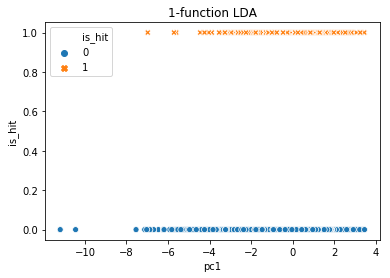

In [71]:
labels = np.array(labels)
lda = LDA(n_components = 1, solver = "svd")  
x_lda = lda.fit_transform(features, labels)
import seaborn as sns
import matplotlib.pyplot as plt
clean['pc1'] = x_lda[:,0 ]
sns.scatterplot(data=clean[['pc1', 'is_hit']] , x = "pc1", y = "is_hit", hue = "is_hit", style = "is_hit").set_title("1-function LDA")
plt.show()
#source: https://medium.com/journey-2-artificial-intelligence/lda-linear-discriminant-analysis-using-python-2155cf5b6398?fbclid=IwAR2CadfG6IpRyiRYbatbCyaU0crMMZ6BgjXiTX7V0VC-62rXaneYgWiTvT8

### We were able to easily differentiate between the classes with high accuracy with just 1 discriminant function. Now let's see what variables played the largest role in this discriminant.

In [58]:
coeffs = pd.Series(lda.coef_.flatten(), index = features.columns)
print("Original coefficients: \n------------------\n", coeffs)
print("\n\nOrdered coefficients: \n----------\n", coeffs.abs().sort_values(ascending = False))

Original coefficients: 
------------------
 danceability        0.361950
energy             -1.228888
loudness            0.068088
speechiness         0.125064
acousticness       -0.126814
instrumentalness   -0.799299
liveness           -0.367808
valence            -0.529646
tempo               0.001417
explicit           -0.218003
dtype: float64


Ordered coefficients: 
----------
 energy              1.228888
instrumentalness    0.799299
valence             0.529646
liveness            0.367808
danceability        0.361950
explicit            0.218003
acousticness        0.126814
speechiness         0.125064
loudness            0.068088
tempo               0.001417
dtype: float64


## From examining the largest coefficients of the 1 discriminant function, we can see that the most important variables in determining hit songs are energy and instrumentalness. 

In [68]:
#save transformed matrix for future use
np.save("lda_feature_matrix.npy", x_lda)